# **IMPORT LIBS**

In [2]:
import sys
import string
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

spotify_path = '../code/Spotify'
sys.path.append(spotify_path)

from Spotify import Spotify as sp

# **Realizando a busca dos artistas**

In [4]:
import itertools
import string

artists = []

letters = string.ascii_lowercase # string.ascii_letters
for i in range(1, len(letters)+1):
    combinations = itertools.combinations(letters, i)
    for combination in combinations:
        q = ''.join(combination)
        for offset in tqdm(range(0, 1000, 50), desc=f'Letra {q}'):
            results = sp.search(q=q, type='artist', limit=50, offset=offset)
            artists += results['artists']['items']

Letra ago:  30%|███       | 6/20 [00:22<00:51,  3.68s/it]


SpotifyException: http status: 429, code:-1 - /v1/search?q=ago&limit=50&offset=300&type=artist:
 Max Retries, reason: too many 500 error responses

In [8]:
artists = []

for letter in string.ascii_letters:
  for offset in tqdm(range(0, 1000, 50), desc=f'Letra {letter}'):
    results = sp.search(q=letter, type='artist', limit=50, offset=offset)
    artists += results['artists']['items']

Letra a:   0%|          | 0/20 [00:00<?, ?it/s]


AttributeError: 'Spotify' object has no attribute 'search'

# **Criando uma rede com as informações obtidas e tratando/retirando algumas colunas**

In [6]:
df = pd.DataFrame(artists)
df['external_urls'] = df['external_urls'].map(lambda x: x['spotify'])
df['followers'] = df['followers'].map(lambda x: x['total'])
df['genres'] = df['genres'].map(lambda x: ', '.join(x))
df.drop(columns=['href', 'images', 'type'], inplace=True)
display(df)

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14773587,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,99108085,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/4dpARuHxo51G3z...,57970425,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,87,spotify:artist:4dpARuHxo51G3z768sgnrY
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,119758870,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,26152311,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,86,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
388441,https://open.spotify.com/artist/1WoKTpupoZIwG8...,5,,1WoKTpupoZIwG8ZnIuU0sc,AgOr,0,spotify:artist:1WoKTpupoZIwG8ZnIuU0sc
388442,https://open.spotify.com/artist/1Z1iSCAsF2oneS...,0,,1Z1iSCAsF2oneS5V2WvFRj,Agony & Stevon Q,0,spotify:artist:1Z1iSCAsF2oneS5V2WvFRj
388443,https://open.spotify.com/artist/0ZcX8fbxtSQ03Z...,23,,0ZcX8fbxtSQ03Z8bGHvfKA,AGORA,0,spotify:artist:0ZcX8fbxtSQ03Z8bGHvfKA
388444,https://open.spotify.com/artist/6isT34ZaiUkltO...,22,,6isT34ZaiUkltOAbuJaIeP,Agonals,0,spotify:artist:6isT34ZaiUkltOAbuJaIeP


# **Retirando os artistas que estão aparecem mais de uma vez no dataset**

In [7]:
df_clean = df.drop_duplicates()
df_clean

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14773587,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,99108085,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/4dpARuHxo51G3z...,57970425,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,87,spotify:artist:4dpARuHxo51G3z768sgnrY
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,119758870,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,26152311,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,86,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
388441,https://open.spotify.com/artist/1WoKTpupoZIwG8...,5,,1WoKTpupoZIwG8ZnIuU0sc,AgOr,0,spotify:artist:1WoKTpupoZIwG8ZnIuU0sc
388442,https://open.spotify.com/artist/1Z1iSCAsF2oneS...,0,,1Z1iSCAsF2oneS5V2WvFRj,Agony & Stevon Q,0,spotify:artist:1Z1iSCAsF2oneS5V2WvFRj
388443,https://open.spotify.com/artist/0ZcX8fbxtSQ03Z...,23,,0ZcX8fbxtSQ03Z8bGHvfKA,AGORA,0,spotify:artist:0ZcX8fbxtSQ03Z8bGHvfKA
388444,https://open.spotify.com/artist/6isT34ZaiUkltO...,22,,6isT34ZaiUkltOAbuJaIeP,Agonals,0,spotify:artist:6isT34ZaiUkltOAbuJaIeP


In [45]:
display(df_clean[df_clean['name'] == 'Marília Mendonça'])
display(df_2[df_2['name'] == 'Marília Mendonça'])

,external_urls,followers,genres,id,name,popularity,uri
12054,https://open.spotify.com/artist/1yR65psqiazQpe...,34356032,"arrocha, sertanejo, sertanejo universitario",1yR65psqiazQpeM79CcGh8,Marília Mendonça,80,spotify:artist:1yR65psqiazQpeM79CcGh8


,external_urls,followers,genres,id,name,popularity,uri
10395,https://open.spotify.com/artist/1yR65psqiazQpe...,34244830,"arrocha, sertanejo, sertanejo universitario",1yR65psqiazQpeM79CcGh8,Marília Mendonça,80,spotify:artist:1yR65psqiazQpeM79CcGh8


,external_urls,followers,genres,id,name,popularity,uri
11819,https://open.spotify.com/artist/3YQKmKGau1PzlV...,24532430,"modern rock, pop, pov: indie, rock",3YQKmKGau1PzlVlkL1iodx,Twenty One Pilots,82,spotify:artist:3YQKmKGau1PzlVlkL1iodx


In [8]:
df_clean.to_csv('spotify_artists.csv', index=False)

In [21]:
df_clean = pd.read_csv('spotify_artists.csv')

# 

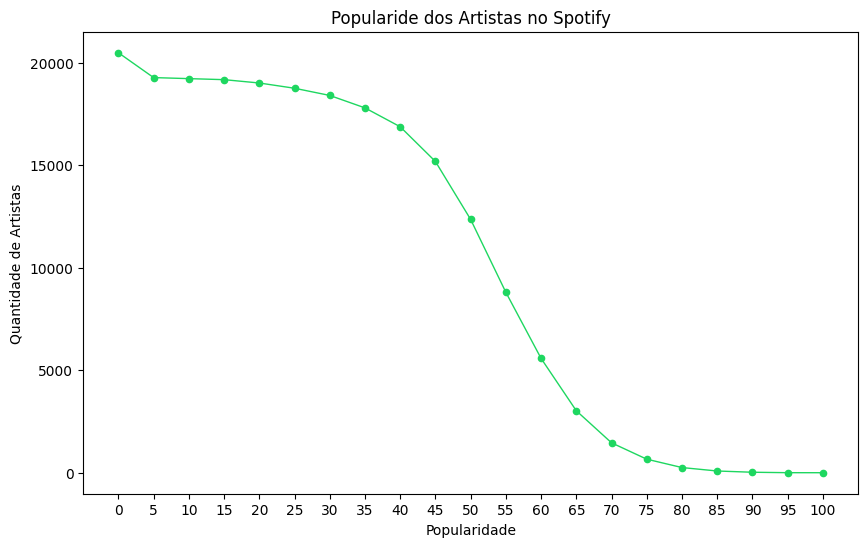

In [ ]:
x_values = list(range(0, 105, 5))
quantity_of_artists = [len(df_clean[df_clean['popularity'] >= value]) for value in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, quantity_of_artists, marker = 'o', color = '#1ED760', markersize=4.5, linewidth=1)
plt.xticks(x_values)
plt.title('Popularide dos Artistas no Spotify')
plt.xlabel('Popularidade')
plt.ylabel('Quantidade de Artistas')
plt.show()